# Project Notebook: Network Analysis

In this notebook, we will explore the analysis of network-structured data using the NetworkX package. This package makes it easy to handle and analyse network-structured data, with many standard network algorithms implemented out-of-the-box.

Let's start by importing NetworkX. 

To display graphs, we will need to import matplotlib. We can do this using `import matplotlib`, but it is actually more convenient to use the command `%pylab inline`. This imports NumPy and matplotlib in a way that allows them to interface well with NetworkX within Jupyter notebooks. Note that `%pylab inline` is a Jupyter-notebooks specific command (any command starting with % is not native python and is known as a Jupyter "magic" command). 

In [1]:
%pylab inline
import networkx as nx

Populating the interactive namespace from numpy and matplotlib


# Working with Graphs

## A first Graph object
NetworkX is a tool for working with networks, also called _graphs_. A graph is a collection of nodes (also called vertices), which are linked by edges. An edge from vertex $v$ to vertex $w$ can be described as the pair $(v, w)$. We'll soon see how to create our own graphs, but NetworkX also has some classical graphs pre-loaded. Let's look at one of these, a graph of 15th century Florentine families. Two family nodes are linked by an edge if there was a marriage linking the families.

In [2]:
G = nx.florentine_families_graph()
type(G)

networkx.classes.graph.Graph

Now `G` is a Graph object. It has a set of vertices, and a set of edges, each of which we can access.

In [3]:
G.nodes

NodeView(('Acciaiuoli', 'Medici', 'Castellani', 'Peruzzi', 'Strozzi', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Albizzi', 'Salviati', 'Pazzi', 'Bischeri', 'Guadagni', 'Ginori', 'Lamberteschi'))

In [4]:
G.edges

EdgeView([('Acciaiuoli', 'Medici'), ('Medici', 'Barbadori'), ('Medici', 'Ridolfi'), ('Medici', 'Tornabuoni'), ('Medici', 'Albizzi'), ('Medici', 'Salviati'), ('Castellani', 'Peruzzi'), ('Castellani', 'Strozzi'), ('Castellani', 'Barbadori'), ('Peruzzi', 'Strozzi'), ('Peruzzi', 'Bischeri'), ('Strozzi', 'Ridolfi'), ('Strozzi', 'Bischeri'), ('Ridolfi', 'Tornabuoni'), ('Tornabuoni', 'Guadagni'), ('Albizzi', 'Ginori'), ('Albizzi', 'Guadagni'), ('Salviati', 'Pazzi'), ('Bischeri', 'Guadagni'), ('Guadagni', 'Lamberteschi')])

Note that the objects `G.nodes`, `G.edges` are _views_. Like NumPy views, if we change `G` then the view is accordingly updated.

In [5]:
nodes = G.nodes #Create a node view
G.add_node('Corleone') #Add a sicilian family.
nodes #The node view has changed!

NodeView(('Acciaiuoli', 'Medici', 'Castellani', 'Peruzzi', 'Strozzi', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Albizzi', 'Salviati', 'Pazzi', 'Bischeri', 'Guadagni', 'Ginori', 'Lamberteschi', 'Corleone'))

To get a visual feel for the data, let's remove that last node and display the graph. To create visuals, `nx` will need matplotlib.

In [6]:
G.remove_node('Corleone') #Remove the non-Florentines.

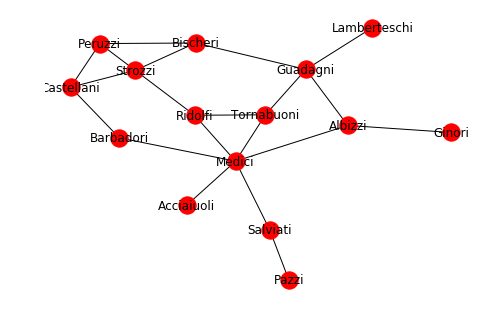

In [7]:
nx.draw(G, with_labels=True)

## Generating Graph objects
We'll also need to know how to create our own graphs in NetworkX. We can build a graph from scratch, starting with an empty graph and adding nodes and edges - either one at a time or in groups.

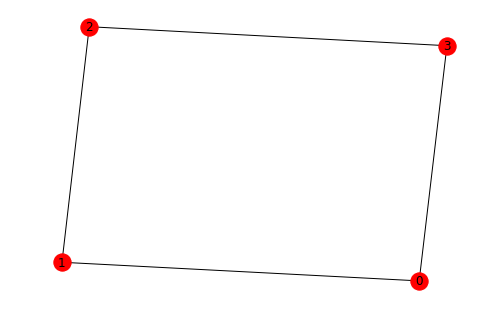

In [8]:
G = nx.Graph()
G.add_node(0)
G.add_nodes_from([1, 2, 3])
G.add_edge(0, 1)
G.add_edges_from([(1, 2), (2, 3), (3, 0)])
nx.draw(G, with_labels=True)

That's great, but quite time-consuming. We can create a graph in one step by giving `nx` a list of edges.

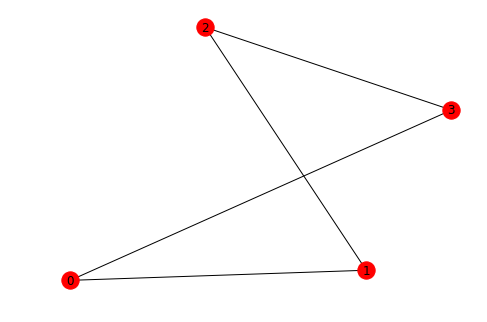

In [9]:
G = nx.Graph([(0, 1), (1, 2), (2, 3), (3, 0)])
nx.draw(G, with_labels=True)

### Exercise
Write a function `complete_graph` that accepts an integer `n`, and returns a Graph object with `n` nodes each linked to every other node.

We may also create directed graphs (digraphs). In the above, our edges had no notion of direction: $(u, v)$ was viewed as the same as $(v, u)$. If we create a digraph, these two edges would be treated differently: the first linking the two edges in the direction _from_ $u$ _to_ $v$, and the second linking them in the opposite direction. Here's an example.

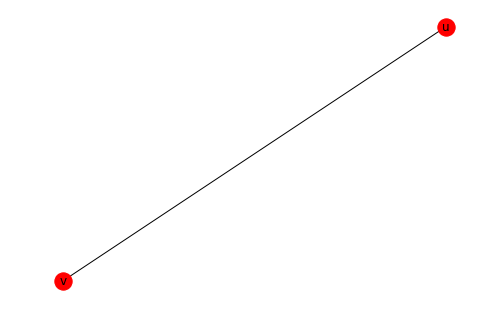

In [10]:
G_1 = nx.Graph([('u', 'v')])
nx.draw(G_1, with_labels=True)

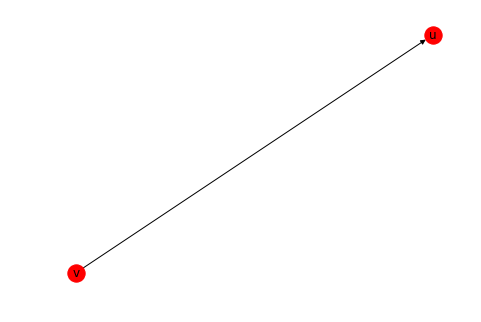

In [11]:
G_2 = nx.DiGraph([('v', 'u')])
nx.draw(G_2, with_labels=True)

The other kind of graph we might want to work with is a multigraph. This is a graph where there might be multiple edges joining $u$ and $v$. There are multigraph versions of both the Graph and DiGraph classes of objects.

In [12]:
G_3 = nx.MultiGraph([('u', 'v'), ('u', 'v')])
G_3.edges

MultiEdgeView([('u', 'v', 0), ('u', 'v', 1)])

In [13]:
G_4 = nx.MultiDiGraph([('u', 'v'), ('v', 'u')])
G_4.edges

OutMultiEdgeView([('u', 'v', 0), ('v', 'u', 0)])

In a MultiGraph or MultiDiGraph, an edge is now a triple, listing the vertices joined in the first two entries and an identifier of the distinct edge in the third entry.

We won't generally have cause to generate a graph from scratch, and NetworkX has [a host of graph generating functions](https://networkx.github.io/documentation/stable/reference/generators.html) available. Of particular use might be the functions for generating random graphs. For instance, we can generate a graph at random with $n$ nodes and $m$ edges.

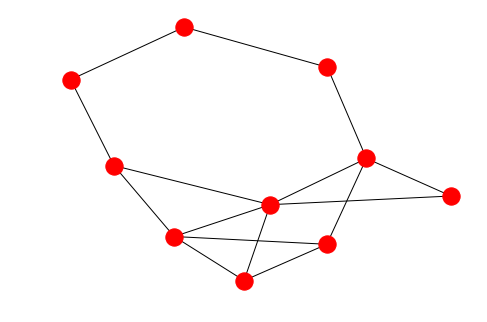

In [14]:
G = nx.gnm_random_graph(10, 15)
nx.draw(G)

All of the methods we have used for creating graphs are called _constructor_ methods.

### Exercise ??
Generate Watts-Strogatz graphs with N=250, and investigate what happens to the average clustering coefficient as K increases.

## Algorithms for Graphs
NetworkX has [convenient implementations](https://networkx.github.io/documentation/stable/reference/algorithms/index.html) of a range of graph algorithms covering a wealth of possible applications. For instance, 

[EXAMPLE]

# Extended Example: Email Data
Here we have data<sup>[[1]](#snap)</sup> from an undisclosed European research institution, representing email exchanges between individuals within the institution

## Loading and preparing the data
The data represents the institution's email network. Individuals are each allocated a unique number. Each line of the file `email-Eu-core.txt` has two identifying nummbers separated by a space, e.g. `n m`, denoting that person $n$ sent an email to person $m$.

We want to analyse this data as a directed graph. To read the data in, create a list called `edges`, and fill it by reading the file line by line, using the string utility function `.split()` to create tuples representing edges. The pass this list to the `nx` constructor for digraphs.

In [16]:
edges = []
fptr = open("./data/email-Eu-core.txt", "r")

for l in fptr:
    edges.append(l.split())

G = nx.DiGraph(edges)

The institution is organised into 42 departments, each of which is assigned a unique identifying number. Each line of the file `email-Eu-core-department-labels.txt` has an individual's identifier, followed by the number identifying their department after a space. Open this file and create a dictionary mapping individuals to their departments.

In [17]:
truth_dict = {}
fptr = open("./data/email-Eu-core-department-labels.txt", "r")
for l in fptr:
    truth_dict.update({l.split()[0]:l.split()[1]})

A graph may be connected or disconnected. An undirected graph is connected if any node can reach any other by walking through a sequence of edges: otherwise it is disconnected. A directed graph is strongly connected if any node can reach any other through a sequence of edges, respecting their direction, and is weakly connected if it is connected, when considered as an undirected graph.

Ude the methods `nx.is_weakly_connected` to check if the graph is weakly connected. If it is not, obtain the subgraph which is the largest weakly connected component.

In [18]:
#Check it is weakly connected!
nx.is_weakly_connected(G)

False

In [19]:
comps = nx.weakly_connected_components(G)
for c in comps:
    print(len(c))

986
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [20]:
G = sorted(nx.weakly_connected_component_subgraphs(G), key=len, reverse=True)[0]
len(G)

986

## Algorithms for connectedness
We can find trhe best connected member if this graph using an algorithm called _pagerank_. We treat an edge directed inwards towards a node as a reccommendation of that node's importance. These reccommendations are weighted by the importance of the reccommending nodes. That may sound circular, but in fact, clever linear algebra allows us to easily compute a score based on this measure of "importance". This is the pagerank of a graph. 

The method `nx.pagerank` will return a dictionary mapping nodes to their respective ranking. Use this ti find out which member of the institution has the highest pagerank!

(Side note: if we consider the graph of the world wide web, where nodes are pages and edges are hyperlinks betweenn them, then pagerank denotes the "best" or "most important" webpage. The algorithm was developed by google to help rank search results, and is still used today whenever you erform a google search!)

In [21]:
PR = nx.pagerank(G)

In [22]:
# Get central team members!
sorted_d = sorted((value, key) for (key,value) in PR.items())
sorted_d[-1]

(0.009629994334257513, '1')

If you use `G.degree`, you will see that the highest scoring node by pagerank is not simply the most well-connected node! (Degree of a node is the number of nodes it is connected to by an edge).

Now let's try to draw the graph of the department that person `1` belongs to. Use your dictionary of department membership to find the nodes which are in the same department as `1`, and then use `nx.subgraph` to produce the graph just containing these nodes.

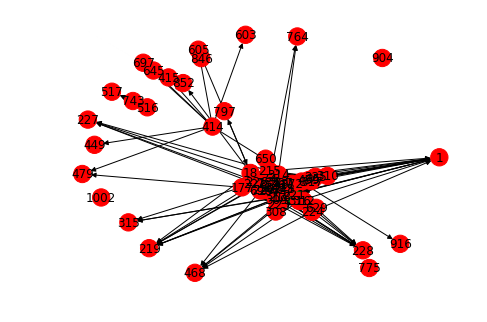

In [23]:
dept = truth_dict['1']
dlist = []
for i in truth_dict.keys():
    if truth_dict[i] == dept:
        dlist.append(i)
D = nx.subgraph(G, dlist)
cols = ['r' for i in dlist]
cols[dlist.index('1')] = 'g'
nx.draw(D, with_labels=True, node_color = cols)

In [24]:
truth_dict['1']

'1'

Another graph property we might be interested in is which edges are bridges. A bridge is an edge which, if removed, would disconnect the graph. Using `nx.bridges`, find out how many bridges this graph has. How many bridges occur within a department?

In [25]:
#Bridge analysis!
count = 0
bad_depts = []
for b in list(nx.bridges(G.to_undirected())):
    if truth_dict[b[0]] == truth_dict[b[1]]:
        count += 1
        bad_depts.append(truth_dict[b[0]])
set(bad_depts)

{'0',
 '1',
 '10',
 '11',
 '14',
 '16',
 '17',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '27',
 '28',
 '30',
 '38',
 '4',
 '7',
 '9'}

The identification of bridges could be useful in, for instance, strategic planning. The help us identify network vulnerabilities, in this case, edges which are crucial to the connectivity of the network. A planner might identify bridges, and investigate which interactions they represent to find ways of strengthening or developing connections in the network.

Som community detection algorithms rely on bridge detection. The [Girvan-Newman](https://en.wikipedia.org/wiki/Girvan%E2%80%93Newman_algorithm) algorithm involves detecting edges which are bridges, or edges which are a lot like bridges, and successively removing them. This slowly disconnects the graph, grouping nodes into communities based on the connected components they end up in. Since many of the departments contain bridges, this method would fail to preserve departmental communities. That may or may not be bad, but it's something we should be aware of.

If we have ground-truth data for a network, or another network which we believe to have similar structure, we can perform simple checks like the one above to determine whether a given algorithm is likely to give us useful information.

## Degree Distribution
How will we know when two networks have a similar structure? There is no simple answer to this question. In the below activity, we'll try to figure out how much like a social network this email network is.

One property that has been observed in some social networks is scalefree structure. This is indicated by plotting the degree distribution of the graph. For every possible degree, we can obtain the number of nodes in the graph with this degree. This data is called the _degree distribution_ of the graph. We can make a plot degree versus the number of nodes observed with this degree in a log-log plot, then if the points lie in a line this indicates a scalefree structure.

In the example below, we calculate the degree distribution from a graph randomly generated using the barabasi-albert method, which was designed to produce scalefree networks. 

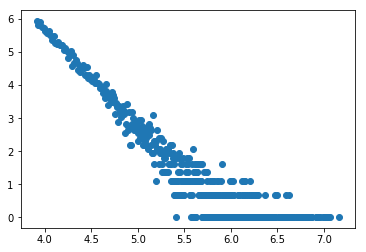

In [36]:
#Generate graph
B_A_graph = nx.barabasi_albert_graph(10000, 50)

#Get a list of node degrees
deg_list = list(dict(B_A_graph.degree()).values())

#Use a Counter to total the occurrences of each degree.
from collections import Counter
counts = Counter(deg_list)
degs = list(counts.keys())
freqs = list(counts.values())

#Take logs and scatter.
x = log(degs)
y = log(freqs)
scatter(x, y)

The top end of the above looks quite linear, while the lower end is a bit splayed out. This is characteristic of a small scalefree network.

In the above code, we used the inbuild `nx` method to obtain a dictionary-like structure mapping nodes to their degree (for technical reasons, custom libraries like `nx` often have their own versions of standard data structures). Casting this to a regular python dict, we can obtain the values and then cast these again to a list!

We then used the Counter object. Calling a Counter on a list will produce a dict mapping unique entries of the list to their frequency in the list.

Finally, we used `numpy.log` and `matlpolib.pyplot.scatter` to obtain a log-log plot. Note that we were able to call these using just `log` and `scatter`. This is a feature of having used `%pylab inline`, which means the functions in `numpy` and `matplotlib.pyplot` are callable at the top level.

By eyeballing the graph above, we can say that the data looks like it falls into a line. We can make this precise using Pearson's coefficient. A coefficient value near $\pm1$ suggest the data are strongly correlated (are a lot like a line), while a value near zero suggest weak correlsation. The Pearson correlation coefficient is implemented in `numpy`. The method `numpy.corrcoef` called with two data sets returns a matrix sowing their correlation. The PCC is in any non-diagonal element of this matrix.

In [38]:
corrcoef(x, y)

array([[ 1.        , -0.91919094],
       [-0.91919094,  1.        ]])

So we can see that `x, y` have a fairly good negative correlation. This formalises out notion of the extent to which `x, y` lie on a downwardly sloping line.

Now try plotting the degree distribution of `G`. Do you think this suggests a scale-free structure? Comare this to a [barabasi-albert graph](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html#networkx.generators.random_graphs.barabasi_albert_graph) with the same number of nodes as G. You should set the parameter `m` to be the average degree of a node in `G`.

Try the same for the subraph you obtained of a single department of the institution. Is this more or less like a social network? Do you think size matters?

# References
1. Data obtained from _SNAP Datasets: Stanford Large Network Dataset Collection_, Jure Leskovec and Andrej Krevl 2014, http://snap.stanford.edu/data, accessed Jan 2019.<a name="snap"></a>

# Miscellaneous

In [ ]:
matplotlib.scat

In [27]:
degvals = dict(degs).values()

TypeError: cannot convert dictionary update sequence element #0 to a sequence

In [ ]:
from collections import Counter
counter = Counter(dict(degs).values())
l1 = list(counter.keys())
l2 = []
for l in counter.keys():
    l2.append(counter[l])
x = log(l1)
y = log(l2)
scatter(x, y)

In [ ]:
nx.draw_circular(nx.triad_graph('300'))

In [ ]:
nx.draw_circular(nx.triad_graph('201'))

In [ ]:
nx.draw_circular(nx.triad_graph('102'))

In [ ]:
nx.draw_circular(nx.triad_graph('003'))

In [ ]:
cens = nx.triadic_census(G)
ws_triads = {'003': 0,
             '012': 0,
             '021C': 0,
             '021D': 0,
             '021U': 0,
             '030C': 0,
             '030T': 0,
             '102': 0,
             '111D': 0,
             '111U': 0,
             '120C': 0,
             '120D': 0,
             '120U': 0,
             '201': 0,
             '210': 0,
             '300': 0}
n = 0
for i in linspace(0.25, 0.75, 10):
    WS = nx.watts_strogatz_graph(len(G), 51, i).to_directed()
    tr = nx.triadic_census(WS)
    for t in tr.keys():
        ws_triads[t] += tr[t]
    n += 1
    print("Completed %d" % n)
    
for t in ws_triads:
    m = ws_triads[t]/10
    ws_triads[t] = m

In [ ]:
bar(linspace(0, 10, len(ws_triads.values())), ws_triads.values())

In [ ]:
cens = nx.triadic_census(G)
ab_triads = {'003': 0,
             '012': 0,
             '021C': 0,
             '021D': 0,
             '021U': 0,
             '030C': 0,
             '030T': 0,
             '102': 0,
             '111D': 0,
             '111U': 0,
             '120C': 0,
             '120D': 0,
             '120U': 0,
             '201': 0,
             '210': 0,
             '300': 0}
n = 0
for i in range(0, 10):
    AB = nx.barabasi_albert_graph(len(G), 51).to_directed()
    tr = nx.triadic_census(AB)
    for t in tr.keys():
        ab_triads[t] += tr[t]
    n += 1
    print("Completed %d" % n)
    
for t in ab_triads:
    m = ab_triads[t]/10
    ab_triads[t] = m

In [ ]:
bar(linspace(0, 10, len(ab_triads.values())), ab_triads.values())

In [ ]:
bar(linspace(0, 10, len(cens.values())), cens.values())

In [ ]:
cens2 = nx.triadic_census(D)

In [ ]:
bar(linspace(0, 10, len(cens2.values())), cens2.values())

In [ ]:
nx.Graph.to_directed()

In [ ]:
bar(linspace(0, 10, len(cens.values())), cens.values())

In [ ]:
cens

In [ ]:
nx.draw(nx.triad_graph('003'))

In [ ]:
depts = {}
for k in truth_dict.keys():
    if truth_dict[k] in depts.keys():
        curr = depts[truth_dict[k]]
        curr.append(k)
        depts[truth_dict[k]] = curr
    else:
        depts[truth_dict[k]] = [k]

In [ ]:
comms2 = list(nx.algorithms.community.asyn_fluid.asyn_fluidc(G.to_undirected(), 42))

In [ ]:
for k in depts.keys():
    maps = set([])
    for e in depts[k]:
        for i in range(len(comms2)):
            if e in comms2[i]:
                maps.add(i)
    if len(maps) == 1:
        print("Dept. %s is preserved!" % k)
 #   print("Dept. %s maps to communities: %s" %(k, str(maps)))

In [ ]:
for k in depts.keys():
    maps = set([])
    for e in depts[k]:
        for i in range(len(comms)):
            if e in comms[i]:
                maps.add(i)
    if len(maps) == 1:
        print("Dept. %s is preserved!" % k)
  #  print("Dept. %s maps to communities: %s" %(k, str(maps)))

In [ ]:
type(type)